# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 기본 LSTM 모델
- 128 메모리 셀을 가진 LSTM 레이어 1개와 Dense 레이어로 구성
- 입력은 샘플이 50개, 타임스텝이 4개, 속성이 1개로 구성
- 상태유지(stateful) 모드 비활성화

In [1]:
# 사용할 패키지 불러오기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [7]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [8]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [9]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

In [10]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [11]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 12)                1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2)

Train on 50 samples
Epoch 1/2000
50/50 - 1s - loss: 2.4730 - accuracy: 0.2000
Epoch 2/2000
50/50 - 0s - loss: 2.4307 - accuracy: 0.3400
Epoch 3/2000
50/50 - 0s - loss: 2.3894 - accuracy: 0.3400
Epoch 4/2000
50/50 - 0s - loss: 2.3494 - accuracy: 0.3400
Epoch 5/2000
50/50 - 0s - loss: 2.2914 - accuracy: 0.3400
Epoch 6/2000
50/50 - 0s - loss: 2.2289 - accuracy: 0.3400
Epoch 7/2000
50/50 - 0s - loss: 2.1549 - accuracy: 0.3400
Epoch 8/2000
50/50 - 0s - loss: 2.0656 - accuracy: 0.3400
Epoch 9/2000
50/50 - 0s - loss: 2.0046 - accuracy: 0.3400
Epoch 10/2000
50/50 - 0s - loss: 1.9925 - accuracy: 0.3400
Epoch 11/2000
50/50 - 0s - loss: 1.9893 - accuracy: 0.3400
Epoch 12/2000
50/50 - 0s - loss: 1.9577 - accuracy: 0.3400
Epoch 13/2000
50/50 - 0s - loss: 1.9455 - accuracy: 0.3400
Epoch 14/2000
50/50 - 0s - loss: 1.9400 - accuracy: 0.3400
Epoch 15/2000
50/50 - 0s - loss: 1.9331 - accuracy: 0.3400
Epoch 16/2000
50/50 - 0s - loss: 1.9249 - accuracy: 0.3400
Epoch 17/2000
50/50 - 0s - loss: 1.9165 - acc

Epoch 140/2000
50/50 - 0s - loss: 1.6558 - accuracy: 0.4000
Epoch 141/2000
50/50 - 0s - loss: 1.6430 - accuracy: 0.4000
Epoch 142/2000
50/50 - 0s - loss: 1.6572 - accuracy: 0.3400
Epoch 143/2000
50/50 - 0s - loss: 1.6533 - accuracy: 0.4000
Epoch 144/2000
50/50 - 0s - loss: 1.6379 - accuracy: 0.4400
Epoch 145/2000
50/50 - 0s - loss: 1.6512 - accuracy: 0.4200
Epoch 146/2000
50/50 - 0s - loss: 1.6366 - accuracy: 0.3800
Epoch 147/2000
50/50 - 0s - loss: 1.6284 - accuracy: 0.4000
Epoch 148/2000
50/50 - 0s - loss: 1.6356 - accuracy: 0.4200
Epoch 149/2000
50/50 - 0s - loss: 1.6196 - accuracy: 0.4000
Epoch 150/2000
50/50 - 0s - loss: 1.6235 - accuracy: 0.3400
Epoch 151/2000
50/50 - 0s - loss: 1.6233 - accuracy: 0.4200
Epoch 152/2000
50/50 - 0s - loss: 1.6142 - accuracy: 0.4400
Epoch 153/2000
50/50 - 0s - loss: 1.6160 - accuracy: 0.4400
Epoch 154/2000
50/50 - 0s - loss: 1.6119 - accuracy: 0.4400
Epoch 155/2000
50/50 - 0s - loss: 1.6139 - accuracy: 0.4400
Epoch 156/2000
50/50 - 0s - loss: 1.6107

Epoch 277/2000
50/50 - 0s - loss: 1.3410 - accuracy: 0.5800
Epoch 278/2000
50/50 - 0s - loss: 1.3385 - accuracy: 0.5800
Epoch 279/2000
50/50 - 0s - loss: 1.3315 - accuracy: 0.5800
Epoch 280/2000
50/50 - 0s - loss: 1.3382 - accuracy: 0.5600
Epoch 281/2000
50/50 - 0s - loss: 1.3313 - accuracy: 0.5800
Epoch 282/2000
50/50 - 0s - loss: 1.3362 - accuracy: 0.5400
Epoch 283/2000
50/50 - 0s - loss: 1.3378 - accuracy: 0.5800
Epoch 284/2000
50/50 - 0s - loss: 1.3340 - accuracy: 0.5600
Epoch 285/2000
50/50 - 0s - loss: 1.3389 - accuracy: 0.5200
Epoch 286/2000
50/50 - 0s - loss: 1.3277 - accuracy: 0.5800
Epoch 287/2000
50/50 - 0s - loss: 1.3264 - accuracy: 0.5600
Epoch 288/2000
50/50 - 0s - loss: 1.3211 - accuracy: 0.5600
Epoch 289/2000
50/50 - 0s - loss: 1.3302 - accuracy: 0.4800
Epoch 290/2000
50/50 - 0s - loss: 1.3114 - accuracy: 0.5600
Epoch 291/2000
50/50 - 0s - loss: 1.3151 - accuracy: 0.5600
Epoch 292/2000
50/50 - 0s - loss: 1.3188 - accuracy: 0.5800
Epoch 293/2000
50/50 - 0s - loss: 1.3210

Epoch 414/2000
50/50 - 0s - loss: 1.1045 - accuracy: 0.5200
Epoch 415/2000
50/50 - 0s - loss: 1.0798 - accuracy: 0.5600
Epoch 416/2000
50/50 - 0s - loss: 1.0704 - accuracy: 0.6000
Epoch 417/2000
50/50 - 0s - loss: 1.0710 - accuracy: 0.6000
Epoch 418/2000
50/50 - 0s - loss: 1.0793 - accuracy: 0.6400
Epoch 419/2000
50/50 - 0s - loss: 1.0736 - accuracy: 0.5400
Epoch 420/2000
50/50 - 0s - loss: 1.0669 - accuracy: 0.5400
Epoch 421/2000
50/50 - 0s - loss: 1.0835 - accuracy: 0.5800
Epoch 422/2000
50/50 - 0s - loss: 1.0656 - accuracy: 0.5800
Epoch 423/2000
50/50 - 0s - loss: 1.0657 - accuracy: 0.5600
Epoch 424/2000
50/50 - 0s - loss: 1.0849 - accuracy: 0.5000
Epoch 425/2000
50/50 - 0s - loss: 1.0689 - accuracy: 0.5400
Epoch 426/2000
50/50 - 0s - loss: 1.0715 - accuracy: 0.5400
Epoch 427/2000
50/50 - 0s - loss: 1.0542 - accuracy: 0.5600
Epoch 428/2000
50/50 - 0s - loss: 1.0501 - accuracy: 0.5800
Epoch 429/2000
50/50 - 0s - loss: 1.0456 - accuracy: 0.5800
Epoch 430/2000
50/50 - 0s - loss: 1.0535

Epoch 551/2000
50/50 - 0s - loss: 0.8208 - accuracy: 0.7400
Epoch 552/2000
50/50 - 0s - loss: 0.8463 - accuracy: 0.6600
Epoch 553/2000
50/50 - 0s - loss: 0.8210 - accuracy: 0.7200
Epoch 554/2000
50/50 - 0s - loss: 0.8042 - accuracy: 0.7200
Epoch 555/2000
50/50 - 0s - loss: 0.8311 - accuracy: 0.7000
Epoch 556/2000
50/50 - 0s - loss: 0.7999 - accuracy: 0.7000
Epoch 557/2000
50/50 - 0s - loss: 0.8265 - accuracy: 0.6800
Epoch 558/2000
50/50 - 0s - loss: 0.8169 - accuracy: 0.6800
Epoch 559/2000
50/50 - 0s - loss: 0.8022 - accuracy: 0.7000
Epoch 560/2000
50/50 - 0s - loss: 0.8007 - accuracy: 0.6600
Epoch 561/2000
50/50 - 0s - loss: 0.7986 - accuracy: 0.7000
Epoch 562/2000
50/50 - 0s - loss: 0.8092 - accuracy: 0.6800
Epoch 563/2000
50/50 - 0s - loss: 0.7921 - accuracy: 0.6800
Epoch 564/2000
50/50 - 0s - loss: 0.7988 - accuracy: 0.6600
Epoch 565/2000
50/50 - 0s - loss: 0.8220 - accuracy: 0.6800
Epoch 566/2000
50/50 - 0s - loss: 0.7887 - accuracy: 0.7000
Epoch 567/2000
50/50 - 0s - loss: 0.8012

Epoch 688/2000
50/50 - 0s - loss: 0.6662 - accuracy: 0.7200
Epoch 689/2000
50/50 - 0s - loss: 0.6498 - accuracy: 0.7800
Epoch 690/2000
50/50 - 0s - loss: 0.6535 - accuracy: 0.7800
Epoch 691/2000
50/50 - 0s - loss: 0.6363 - accuracy: 0.7600
Epoch 692/2000
50/50 - 0s - loss: 0.6423 - accuracy: 0.8000
Epoch 693/2000
50/50 - 0s - loss: 0.6275 - accuracy: 0.7600
Epoch 694/2000
50/50 - 0s - loss: 0.6349 - accuracy: 0.7800
Epoch 695/2000
50/50 - 0s - loss: 0.6607 - accuracy: 0.7400
Epoch 696/2000
50/50 - 0s - loss: 0.6408 - accuracy: 0.7200
Epoch 697/2000
50/50 - 0s - loss: 0.6601 - accuracy: 0.7600
Epoch 698/2000
50/50 - 0s - loss: 0.6396 - accuracy: 0.7800
Epoch 699/2000
50/50 - 0s - loss: 0.6212 - accuracy: 0.7600
Epoch 700/2000
50/50 - 0s - loss: 0.6412 - accuracy: 0.7600
Epoch 701/2000
50/50 - 0s - loss: 0.6226 - accuracy: 0.7600
Epoch 702/2000
50/50 - 0s - loss: 0.6296 - accuracy: 0.7400
Epoch 703/2000
50/50 - 0s - loss: 0.6362 - accuracy: 0.8000
Epoch 704/2000
50/50 - 0s - loss: 0.6163

Epoch 825/2000
50/50 - 0s - loss: 0.5422 - accuracy: 0.8400
Epoch 826/2000
50/50 - 0s - loss: 0.5366 - accuracy: 0.7600
Epoch 827/2000
50/50 - 0s - loss: 0.5306 - accuracy: 0.8200
Epoch 828/2000
50/50 - 0s - loss: 0.5225 - accuracy: 0.8200
Epoch 829/2000
50/50 - 0s - loss: 0.5413 - accuracy: 0.7800
Epoch 830/2000
50/50 - 0s - loss: 0.5562 - accuracy: 0.8000
Epoch 831/2000
50/50 - 0s - loss: 0.5358 - accuracy: 0.7600
Epoch 832/2000
50/50 - 0s - loss: 0.5313 - accuracy: 0.8000
Epoch 833/2000
50/50 - 0s - loss: 0.5397 - accuracy: 0.8000
Epoch 834/2000
50/50 - 0s - loss: 0.5282 - accuracy: 0.8200
Epoch 835/2000
50/50 - 0s - loss: 0.5251 - accuracy: 0.8400
Epoch 836/2000
50/50 - 0s - loss: 0.5255 - accuracy: 0.8400
Epoch 837/2000
50/50 - 0s - loss: 0.5436 - accuracy: 0.8000
Epoch 838/2000
50/50 - 0s - loss: 0.5500 - accuracy: 0.8200
Epoch 839/2000
50/50 - 0s - loss: 0.5068 - accuracy: 0.8600
Epoch 840/2000
50/50 - 0s - loss: 0.5671 - accuracy: 0.8000
Epoch 841/2000
50/50 - 0s - loss: 0.5471

Epoch 962/2000
50/50 - 0s - loss: 0.4491 - accuracy: 0.8800
Epoch 963/2000
50/50 - 0s - loss: 0.4817 - accuracy: 0.8400
Epoch 964/2000
50/50 - 0s - loss: 0.4740 - accuracy: 0.8400
Epoch 965/2000
50/50 - 0s - loss: 0.4580 - accuracy: 0.8400
Epoch 966/2000
50/50 - 0s - loss: 0.4737 - accuracy: 0.8200
Epoch 967/2000
50/50 - 0s - loss: 0.4509 - accuracy: 0.8400
Epoch 968/2000
50/50 - 0s - loss: 0.4628 - accuracy: 0.8200
Epoch 969/2000
50/50 - 0s - loss: 0.4683 - accuracy: 0.8200
Epoch 970/2000
50/50 - 0s - loss: 0.4611 - accuracy: 0.8600
Epoch 971/2000
50/50 - 0s - loss: 0.4618 - accuracy: 0.8200
Epoch 972/2000
50/50 - 0s - loss: 0.4775 - accuracy: 0.8400
Epoch 973/2000
50/50 - 0s - loss: 0.4476 - accuracy: 0.8600
Epoch 974/2000
50/50 - 0s - loss: 0.4724 - accuracy: 0.8400
Epoch 975/2000
50/50 - 0s - loss: 0.5648 - accuracy: 0.7800
Epoch 976/2000
50/50 - 0s - loss: 0.4734 - accuracy: 0.8400
Epoch 977/2000
50/50 - 0s - loss: 0.5135 - accuracy: 0.8400
Epoch 978/2000
50/50 - 0s - loss: 0.5490

Epoch 1097/2000
50/50 - 0s - loss: 0.4152 - accuracy: 0.8600
Epoch 1098/2000
50/50 - 0s - loss: 0.4114 - accuracy: 0.8400
Epoch 1099/2000
50/50 - 0s - loss: 0.4465 - accuracy: 0.8400
Epoch 1100/2000
50/50 - 0s - loss: 0.4513 - accuracy: 0.8400
Epoch 1101/2000
50/50 - 0s - loss: 0.4733 - accuracy: 0.8400
Epoch 1102/2000
50/50 - 0s - loss: 0.4143 - accuracy: 0.8400
Epoch 1103/2000
50/50 - 0s - loss: 0.4432 - accuracy: 0.8200
Epoch 1104/2000
50/50 - 0s - loss: 0.4140 - accuracy: 0.8400
Epoch 1105/2000
50/50 - 0s - loss: 0.4126 - accuracy: 0.8600
Epoch 1106/2000
50/50 - 0s - loss: 0.4178 - accuracy: 0.8600
Epoch 1107/2000
50/50 - 0s - loss: 0.3998 - accuracy: 0.8600
Epoch 1108/2000
50/50 - 0s - loss: 0.4354 - accuracy: 0.8400
Epoch 1109/2000
50/50 - 0s - loss: 0.3989 - accuracy: 0.8400
Epoch 1110/2000
50/50 - 0s - loss: 0.4127 - accuracy: 0.8600
Epoch 1111/2000
50/50 - 0s - loss: 0.4005 - accuracy: 0.8600
Epoch 1112/2000
50/50 - 0s - loss: 0.4111 - accuracy: 0.8400
Epoch 1113/2000
50/50 - 

Epoch 1232/2000
50/50 - 0s - loss: 0.4174 - accuracy: 0.8600
Epoch 1233/2000
50/50 - 0s - loss: 0.4407 - accuracy: 0.8400
Epoch 1234/2000
50/50 - 0s - loss: 0.3606 - accuracy: 0.8600
Epoch 1235/2000
50/50 - 0s - loss: 0.4282 - accuracy: 0.8400
Epoch 1236/2000
50/50 - 0s - loss: 0.3863 - accuracy: 0.8400
Epoch 1237/2000
50/50 - 0s - loss: 0.3812 - accuracy: 0.8800
Epoch 1238/2000
50/50 - 0s - loss: 0.4044 - accuracy: 0.8400
Epoch 1239/2000
50/50 - 0s - loss: 0.3693 - accuracy: 0.8400
Epoch 1240/2000
50/50 - 0s - loss: 0.3946 - accuracy: 0.8600
Epoch 1241/2000
50/50 - 0s - loss: 0.4525 - accuracy: 0.8200
Epoch 1242/2000
50/50 - 0s - loss: 0.3719 - accuracy: 0.8800
Epoch 1243/2000
50/50 - 0s - loss: 0.4425 - accuracy: 0.8000
Epoch 1244/2000
50/50 - 0s - loss: 0.4585 - accuracy: 0.8400
Epoch 1245/2000
50/50 - 0s - loss: 0.3951 - accuracy: 0.8400
Epoch 1246/2000
50/50 - 0s - loss: 0.4999 - accuracy: 0.8000
Epoch 1247/2000
50/50 - 0s - loss: 0.4095 - accuracy: 0.8400
Epoch 1248/2000
50/50 - 

Epoch 1367/2000
50/50 - 0s - loss: 0.3643 - accuracy: 0.8600
Epoch 1368/2000
50/50 - 0s - loss: 0.3476 - accuracy: 0.8800
Epoch 1369/2000
50/50 - 0s - loss: 0.3573 - accuracy: 0.8600
Epoch 1370/2000
50/50 - 0s - loss: 0.3469 - accuracy: 0.9000
Epoch 1371/2000
50/50 - 0s - loss: 0.3556 - accuracy: 0.8600
Epoch 1372/2000
50/50 - 0s - loss: 0.3887 - accuracy: 0.8400
Epoch 1373/2000
50/50 - 0s - loss: 0.3673 - accuracy: 0.8600
Epoch 1374/2000
50/50 - 0s - loss: 0.3736 - accuracy: 0.8600
Epoch 1375/2000
50/50 - 0s - loss: 0.4034 - accuracy: 0.8600
Epoch 1376/2000
50/50 - 0s - loss: 0.3647 - accuracy: 0.8600
Epoch 1377/2000
50/50 - 0s - loss: 0.3746 - accuracy: 0.8400
Epoch 1378/2000
50/50 - 0s - loss: 0.3638 - accuracy: 0.8600
Epoch 1379/2000
50/50 - 0s - loss: 0.3489 - accuracy: 0.8600
Epoch 1380/2000
50/50 - 0s - loss: 0.3454 - accuracy: 0.8800
Epoch 1381/2000
50/50 - 0s - loss: 0.3459 - accuracy: 0.8800
Epoch 1382/2000
50/50 - 0s - loss: 0.3580 - accuracy: 0.8400
Epoch 1383/2000
50/50 - 

Epoch 1502/2000
50/50 - 0s - loss: 0.3310 - accuracy: 0.8800
Epoch 1503/2000
50/50 - 0s - loss: 0.3626 - accuracy: 0.8600
Epoch 1504/2000
50/50 - 0s - loss: 0.4014 - accuracy: 0.7800
Epoch 1505/2000
50/50 - 0s - loss: 0.3274 - accuracy: 0.8600
Epoch 1506/2000
50/50 - 0s - loss: 0.3952 - accuracy: 0.8600
Epoch 1507/2000
50/50 - 0s - loss: 0.3403 - accuracy: 0.8600
Epoch 1508/2000
50/50 - 0s - loss: 0.3440 - accuracy: 0.8600
Epoch 1509/2000
50/50 - 0s - loss: 0.3567 - accuracy: 0.8800
Epoch 1510/2000
50/50 - 0s - loss: 0.3575 - accuracy: 0.8600
Epoch 1511/2000
50/50 - 0s - loss: 0.3297 - accuracy: 0.8600
Epoch 1512/2000
50/50 - 0s - loss: 0.3475 - accuracy: 0.8800
Epoch 1513/2000
50/50 - 0s - loss: 0.3405 - accuracy: 0.8800
Epoch 1514/2000
50/50 - 0s - loss: 0.3381 - accuracy: 0.8800
Epoch 1515/2000
50/50 - 0s - loss: 0.3322 - accuracy: 0.9000
Epoch 1516/2000
50/50 - 0s - loss: 0.3449 - accuracy: 0.8600
Epoch 1517/2000
50/50 - 0s - loss: 0.3570 - accuracy: 0.8400
Epoch 1518/2000
50/50 - 

Epoch 1637/2000
50/50 - 0s - loss: 0.3197 - accuracy: 0.8600
Epoch 1638/2000
50/50 - 0s - loss: 0.3252 - accuracy: 0.8600
Epoch 1639/2000
50/50 - 0s - loss: 0.3100 - accuracy: 0.8800
Epoch 1640/2000
50/50 - 0s - loss: 0.3579 - accuracy: 0.8600
Epoch 1641/2000
50/50 - 0s - loss: 0.3773 - accuracy: 0.8600
Epoch 1642/2000
50/50 - 0s - loss: 0.3319 - accuracy: 0.8600
Epoch 1643/2000
50/50 - 0s - loss: 0.3956 - accuracy: 0.8600
Epoch 1644/2000
50/50 - 0s - loss: 0.3148 - accuracy: 0.8800
Epoch 1645/2000
50/50 - 0s - loss: 0.3661 - accuracy: 0.8800
Epoch 1646/2000
50/50 - 0s - loss: 0.3940 - accuracy: 0.8400
Epoch 1647/2000
50/50 - 0s - loss: 0.3475 - accuracy: 0.8800
Epoch 1648/2000
50/50 - 0s - loss: 0.3445 - accuracy: 0.8800
Epoch 1649/2000
50/50 - 0s - loss: 0.3061 - accuracy: 0.8800
Epoch 1650/2000
50/50 - 0s - loss: 0.3265 - accuracy: 0.8400
Epoch 1651/2000
50/50 - 0s - loss: 0.3228 - accuracy: 0.9000
Epoch 1652/2000
50/50 - 0s - loss: 0.3173 - accuracy: 0.9000
Epoch 1653/2000
50/50 - 

Epoch 1772/2000
50/50 - 0s - loss: 0.2958 - accuracy: 0.8800
Epoch 1773/2000
50/50 - 0s - loss: 0.3194 - accuracy: 0.8800
Epoch 1774/2000
50/50 - 0s - loss: 0.3000 - accuracy: 0.8800
Epoch 1775/2000
50/50 - 0s - loss: 0.3193 - accuracy: 0.8800
Epoch 1776/2000
50/50 - 0s - loss: 0.3048 - accuracy: 0.8800
Epoch 1777/2000
50/50 - 0s - loss: 0.3015 - accuracy: 0.8600
Epoch 1778/2000
50/50 - 0s - loss: 0.3090 - accuracy: 0.8600
Epoch 1779/2000
50/50 - 0s - loss: 0.3089 - accuracy: 0.8400
Epoch 1780/2000
50/50 - 0s - loss: 0.3011 - accuracy: 0.8400
Epoch 1781/2000
50/50 - 0s - loss: 0.3100 - accuracy: 0.8600
Epoch 1782/2000
50/50 - 0s - loss: 0.3055 - accuracy: 0.8800
Epoch 1783/2000
50/50 - 0s - loss: 0.3051 - accuracy: 0.8600
Epoch 1784/2000
50/50 - 0s - loss: 0.2985 - accuracy: 0.8600
Epoch 1785/2000
50/50 - 0s - loss: 0.3089 - accuracy: 0.8600
Epoch 1786/2000
50/50 - 0s - loss: 0.3019 - accuracy: 0.8600
Epoch 1787/2000
50/50 - 0s - loss: 0.3075 - accuracy: 0.8800
Epoch 1788/2000
50/50 - 

Epoch 1907/2000
50/50 - 0s - loss: 0.3006 - accuracy: 0.9000
Epoch 1908/2000
50/50 - 0s - loss: 0.3156 - accuracy: 0.8400
Epoch 1909/2000
50/50 - 0s - loss: 0.2958 - accuracy: 0.8400
Epoch 1910/2000
50/50 - 0s - loss: 0.2929 - accuracy: 0.8600
Epoch 1911/2000
50/50 - 0s - loss: 0.2918 - accuracy: 0.8600
Epoch 1912/2000
50/50 - 0s - loss: 0.3073 - accuracy: 0.8400
Epoch 1913/2000
50/50 - 0s - loss: 0.3136 - accuracy: 0.8600
Epoch 1914/2000
50/50 - 0s - loss: 0.3043 - accuracy: 0.8800
Epoch 1915/2000
50/50 - 0s - loss: 0.2985 - accuracy: 0.8600
Epoch 1916/2000
50/50 - 0s - loss: 0.2857 - accuracy: 0.8800
Epoch 1917/2000
50/50 - 0s - loss: 0.3126 - accuracy: 0.8600
Epoch 1918/2000
50/50 - 0s - loss: 0.2863 - accuracy: 0.8800
Epoch 1919/2000
50/50 - 0s - loss: 0.3105 - accuracy: 0.8600
Epoch 1920/2000
50/50 - 0s - loss: 0.2890 - accuracy: 0.8800
Epoch 1921/2000
50/50 - 0s - loss: 0.3003 - accuracy: 0.8600
Epoch 1922/2000
50/50 - 0s - loss: 0.2883 - accuracy: 0.8600
Epoch 1923/2000
50/50 - 

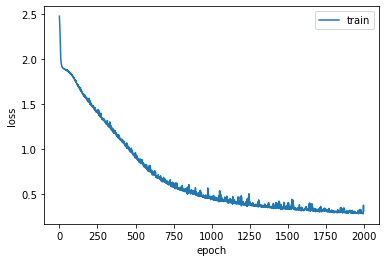

In [14]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [15]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 6ms/sample - loss: 0.3052 - accuracy: 0.8600
accuracy: 86.00%


In [16]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [17]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4', 'f4', 'f4', 'e8', 'e8', 'e8', 'e8', 'g4', 'g4', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_one_step_prediction.mp3)

In [18]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in]  # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1))    # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'd8', 'd4', 'e8', 'e8', 'g8', 'd8', 'd4', 'c8', 'd8', 'g8', 'f8', 'g8', 'e8', 'e4', 'c8', 'd8', 'd8', 'd8', 'g8', 'f4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_full_song_prediction.mp3)